In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import pandas as pd
import os
from pydub import AudioSegment
from pydub.utils import mediainfo

In [14]:
plt.rcParams['figure.figsize'] = [15, 10]
TEST_PATH = "./tests/"
DATA_PATH = "./audio_data/"

In [67]:
def load_audio_file(file_path, ext):
    audio = AudioSegment.from_file(file_path, ext)
    return audio

def cut_audio_file(audio_file, path):
    """
    Cut 5 minutes sample in 100 samples of 3 seconds length 
    """
    for i in range(0, 100):
        start = (i * 3) * 1000
        five_seconds = start + (3 * 1000)
        cutted = audio_file[start:five_seconds]
        name = path.format(i)
        cutted.export(name, format='mp3')
        
def find_centeroid(arr):
    arr = np.array(arr)
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [5]:
def wav_to_mfcc(file_path, n_mfcc=100):
    """
    @n_mfcc: number of mfcc features
    @return: np.array of shape (n_mfcc, sample_length)
    """
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=sr, n_mfcc=100)
    #mfcc = preprocessing(mfcc, norm='l1', axis=1)

    return mfcc

In [6]:
def reduce_mfcc_space(DATA_PATH, n_dims=2):
    """
    Using Principal component analysis (PCA) to reduce to n-dimensions
    
    @DATA_PATH: path to a folder containing multiple samples
    @n-dims: default to 2, but it can be changed to 3 or more
    @return: 2 dimensional np.array
    """
    data = []
    files = os.listdir(DATA_PATH)
    
    for f in files:
        chunk = wav_to_mfcc(DATA_PATH + '/' + f)
        pca = PCA(n_components=n_dims)
        pca.fit(chunk)
        s = pca.singular_values_
        data.append(s)
    return data

def single_audio_reduce_mfcc_space(FILE_PATH, n_dims=2):
    """
    Same as reduce_mfcc_space() but for a single file
    
    @FILE_PATH: path to the single audio file
    @return: 2 dimensional np.array
    """
    data = []
    
    chunk = wav_to_mfcc(FILE_PATH)
    pca = PCA(n_components=n_dims)
    pca.fit(chunk)
    s = pca.singular_values_
    data.append(s)
    return data

In [177]:
# Prepare 3 seconds audio samples 

# Lorenzo voice
audio = load_audio_file(TEST_PATH + '01_Lorenzo_Audio.m4a', 'm4a')
cut_audio_file(audio, './audio_data/lorenzo_3_sec/lorenzo_3_sec_{}.mp3')

# Claudia voice
audio = load_audio_file(TEST_PATH + '01_Claudia_Audio.m4a', 'm4a')
cut_audio_file(audio, './audio_data/claudia_3_sec/claudia_3_sec_{}.mp3')

# Obama voice
audio = load_audio_file(TEST_PATH + '01_Obama_Audio.mp3', 'mp3')
cut_audio_file(audio, './audio_data/obama_3_sec/obama_3_sec_{}.mp3')

## Plotting MFCC features with 3 seconds sample audio

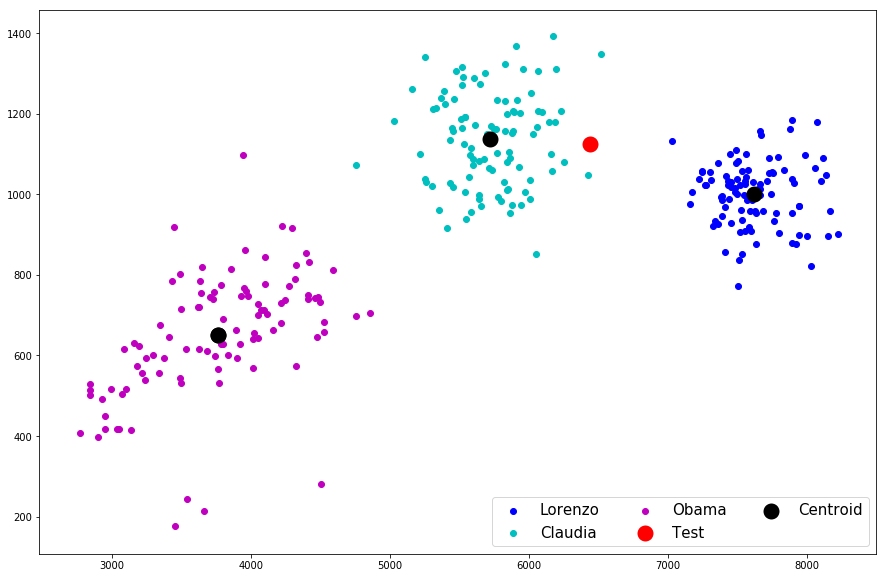

In [68]:
colors = ['b', 'c', 'm', 'r', 'b']

data1 = reduce_mfcc_space(DATA_PATH + 'lorenzo_3_sec')
data2 = reduce_mfcc_space(DATA_PATH + 'claudia_3_sec')
data3 = reduce_mfcc_space(DATA_PATH + 'obama_3_sec')

cent1 = find_centeroid(data1)
cent2 = find_centeroid(data2)
cent3 = find_centeroid(data3)

test = single_audio_reduce_mfcc_space(TEST_PATH + 'claudia_test_3_sec.m4a')

for point in data1:
    a = plt.scatter(point[0], point[1], marker='o', color=colors[0])

for point in data2:
    b = plt.scatter(point[0], point[1], marker='o', color=colors[1])
    
c = plt.scatter(cent3[0], cent3[1], marker='o', color='black', linewidths=10)
for point in data3:
    c = plt.scatter(point[0], point[1], marker='o', color=colors[2])
    
d = plt.scatter(test[0][0], test[0][1], marker='o', color=colors[3], linewidths=10)

e = plt.scatter(cent1[0], cent1[1], marker='o', color='black', linewidths=10)
e = plt.scatter(cent2[0], cent2[1], marker='o', color='black', linewidths=10)
e = plt.scatter(cent3[0], cent3[1], marker='o', color='black', linewidths=10)
    
plt.legend((a, b, c, d, e),
           ('Lorenzo', 'Claudia', 'Obama', 'Test', 'Centroid'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=15)

plt.show()

## Plotting MFCC features with 10 seconds sample audio

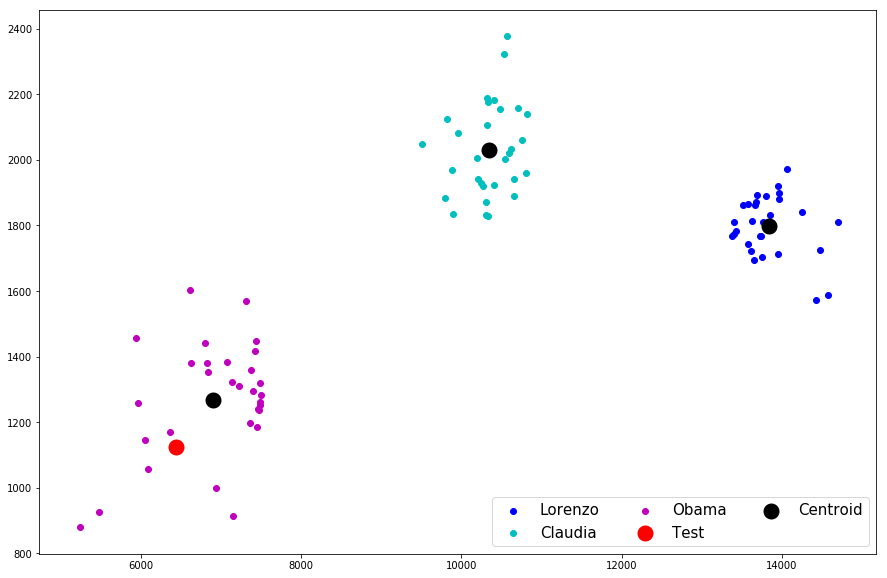

In [69]:
colors = ['b', 'c', 'm', 'r']

data1 = reduce_mfcc_space(DATA_PATH + 'lorenzo')
data2 = reduce_mfcc_space(DATA_PATH + 'claudia')
data3 = reduce_mfcc_space(DATA_PATH + 'obama')

cent1 = find_centeroid(data1)
cent2 = find_centeroid(data2)
cent3 = find_centeroid(data3)

test = single_audio_reduce_mfcc_space(TEST_PATH + 'claudia_test_3_sec.m4a')

for point in data1:
    a = plt.scatter(point[0], point[1], marker='o', color=colors[0])
    
for point in data2:
    b = plt.scatter(point[0], point[1], marker='o', color=colors[1])
    
for point in data3:
    c = plt.scatter(point[0], point[1], marker='o', color=colors[2])
    
d = plt.scatter(test[0][0], test[0][1], marker='o', color=colors[3], linewidths=10)

e = plt.scatter(cent1[0], cent1[1], marker='o', color='black', linewidths=10)
e = plt.scatter(cent2[0], cent2[1], marker='o', color='black', linewidths=10)
e = plt.scatter(cent3[0], cent3[1], marker='o', color='black', linewidths=10)
    
plt.legend((a, b, c, d, e),
           ('Lorenzo', 'Claudia', 'Obama', 'Test', 'Centroid'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=15)

plt.show()

## Summary

In the first plot, we see 3 seconds length samples, while in the second plot samples are 10 seconds length. In both cases the test sample (belonging to the class "Claudia") is 3 seconds long.
As we can see, in the first case the test sample is plotted in the right class, while in the second plot not. This means that predictions must be done with samples of the same length.

## Plotting MFCC features with 3 seconds sample audio in 3D space

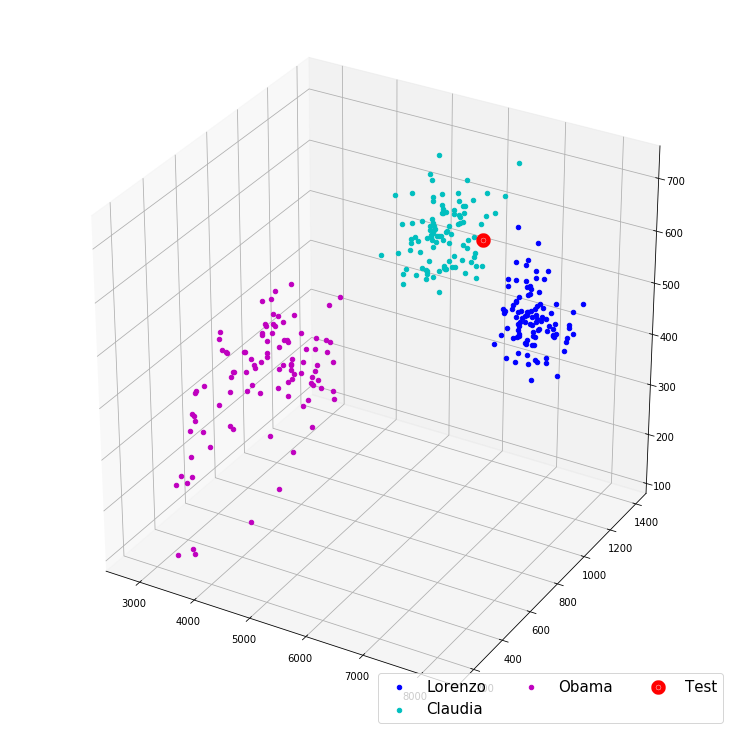

In [57]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure(figsize=(10, 10))
ax = Axes3D(fig)

colors = ['b', 'c', 'm', 'r']

data1 = reduce_mfcc_space(DATA_PATH + 'lorenzo_3_sec', n_dims=3)
data2 = reduce_mfcc_space(DATA_PATH + 'claudia_3_sec', n_dims=3)
data3 = reduce_mfcc_space(DATA_PATH + 'obama_3_sec', n_dims=3)

test = single_audio_reduce_mfcc_space(TEST_PATH + 'claudia_test_3_sec.m4a', n_dims=3)

for point in data1:
    a = ax.scatter(point[0], point[1], point[2], marker='o', color=colors[0])
    
for point in data2:
    b = ax.scatter(point[0], point[1], point[2], marker='o', color=colors[1])
    
for point in data3:
    c = ax.scatter(point[0], point[1], point[2], marker='o', color=colors[2])
    
d = ax.scatter(test[0][0], test[0][1], test[0][2], marker='o', color=colors[3], linewidths=10)
    
ax.legend((a, b, c, d),
           ('Lorenzo', 'Claudia', 'Obama', 'Test'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=15)

pyplot.show()

## OneClassSVM
### [ NOT WORKING YET ]

In [56]:
from sklearn.svm import OneClassSVM

# Load data
def get_mfcc(DATA_PATH):
    data = []
    files = os.listdir(DATA_PATH)

    for f in files:
        chunk = wav_to_mfcc(DATA_PATH + '/' + f)
        data.append(chunk)
    return np.array(data)
    

# one_voice shape is (n_samples, n_mfcc, sample_length)
one_voice = get_mfcc(DATA_PATH + 'lorenzo_3_sec')
print(one_voice.shape)
# reshape to shape (n_samples, n_mfcc * sample_length)
one_voice = one_voice.reshape(one_voice.shape[0], -1)
print(one_voice.shape)

test = wav_to_mfcc(TEST_PATH + '/lorenzo_test_1_3_sec.mp3')
test = test.reshape(1, -1)
print(test.shape)

# Train
svm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
svm.fit(one_voice)

pred = svm.predict(test)
print(pred)

(100, 100, 262)
(100, 26200)
(1, 26200)
[-1]
